In [ ]:
import defs
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from scipy import constants
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('/Users/max/HiPACE/hipace/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')

n = 'none'
# n = 'noneDomain'
b = 'behindShort'
# f = 'frontLong'
f = 'frontShort'

none = defs.Functions(path = f'/Users/max/HiPACE/recovery/filament/h5/{n}/', insitu_path = f'/Users/max/HiPACE/recovery/filament/insitu/{n}/', n0 = 1e17, iteration = 0, normalized = True, recovery = False)
behind = defs.Functions(path = f'/Users/max/HiPACE/recovery/filament/h5/{b}/', insitu_path = f'/Users/max/HiPACE/recovery/filament/insitu/{b}/', n0 = 1e17, iteration = 0, normalized = True, recovery = True)
front = defs.Functions(path = f'/Users/max/HiPACE/recovery/filament/h5/{f}/', insitu_path = f'/Users/max/HiPACE/recovery/filament/insitu/{f}/', n0 = 1e17, iteration = 0, normalized = True, recovery = True)

IA = constants.m_e * constants.c**3 / constants.e

none.customCMAP()

In [10]:
print(f'No Recovery : {none.quickEfficiency(iteration = none.iteration):.2f} %\nBehind : {behind.quickEfficiency(iteration = behind.iteration):.2f} %\nFront : {front.quickEfficiency(iteration = front.iteration):.2f} %')

No Recovery : 3.44 %
Behind : 11.96 %
Front : 29.65 %


In [60]:
front.emittance(sigma_x=0.029, sigma_ux=0.9134409652183785, normalized=True)
# none.emittance(sigma_x=0.05, sigma_ux=3.5286668139997786, normalized=True)
# front.emittance(sigma_x=0.05, sigma_ux=3.528666814854075, normalized=True)
# behind.emittance(sigma_x=0.05, sigma_ux=3.535533906, normalized=True)

4.451513086234935e-07

In [12]:
print(f'Drive : {behind.transverse_u_std_matched(behind.driveInsitu, True, 0.05)}\nWitness: {behind.transverse_u_std_matched(behind.witnessInsitu, True, 0.029)}\nRecovery: {behind.transverse_u_std_matched(behind.recoveryInsitu, True, 0.029)}')

Drive : 3.5286668139997577
Witness: 0.9164152017744112
Recovery: 0.9194679099664894


In [13]:
np.mean([diag.emittance_x(none.witnessInsitu['average'])[0], diag.emittance_y(none.witnessInsitu['average'])[0]])*none.kp_inv * 1e6 # µm rad

0.4476185385205068

In [14]:
print(f'nDrive {none.charge(q = diag.total_charge(none.driveInsitu))[0]}\tnWitness {none.charge(q = diag.total_charge(none.witnessInsitu))[0]}\nbDrive {behind.charge(q = diag.total_charge(behind.driveInsitu))[0]}\tbWitness {behind.charge(q = diag.total_charge(behind.witnessInsitu))[0]}\tbRecovery {behind.charge(q = diag.total_charge(behind.recoveryInsitu))[0]}\nfDrive {front.charge(q = diag.total_charge(front.driveInsitu))[0]}\tfWitness {front.charge(q = diag.total_charge(front.witnessInsitu))[0]}\tfRecovery {front.charge(q = diag.total_charge(front.recoveryInsitu))[0]}')

nDrive -3.3768487497636683e-09	nWitness 1.6124025479024346e-10
bDrive -3.3768487497636873e-09	bWitness 1.7923177551410119e-10	bRecovery -5.166504544595186e-10
fDrive -3.376848749763684e-09	fWitness 1.8077220378139348e-10	fRecovery -7.070571013576659e-10


In [ ]:
front.info.z[front.maskW]

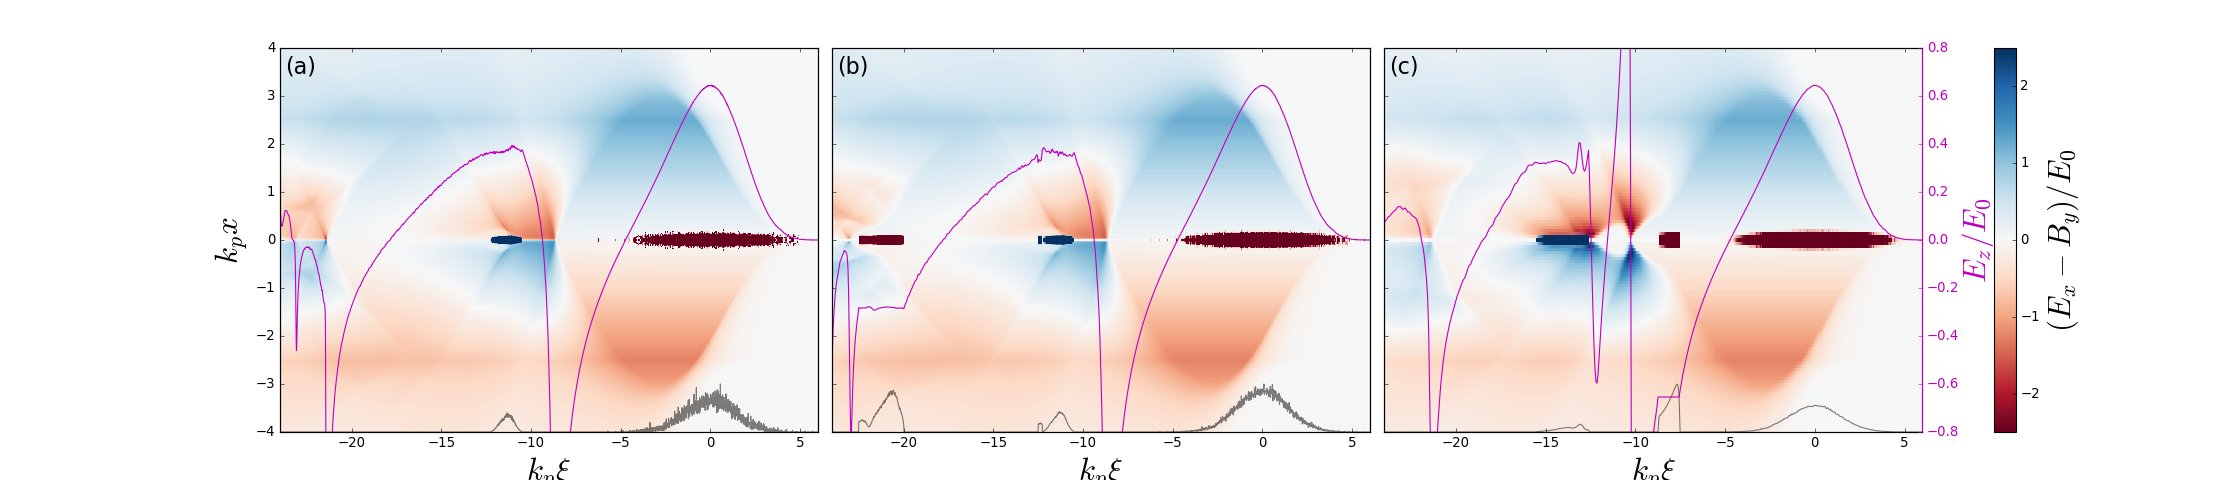

In [16]:
s = 2.5
col = 'm'
pd = .9
prfl = 'k'

plt.close()
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(28, 6), gridspec_kw={'width_ratios': [1, 1, 1.175]})
plt.subplots_adjust(wspace=0.025)

imNone = axs[0].pcolormesh(none.info.z, none.info.x, none.ExmBy.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[0].pcolormesh(none.info.z, none.info.x, none.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[0].plot(none.info.z, 1. * none.profile / max(none.profile) - 4, prfl, alpha = .5)
ax2 = axs[0].twinx()
ax2.plot(none.info.z, none.Ez, color = col)
ax2.set_ylim(-.8, .8)
ax2.axes.get_yaxis().set_visible(False)

imBehind = axs[1].pcolormesh(behind.info.z, behind.info.x, behind.ExmBy.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[1].pcolormesh(behind.info.z, behind.info.x, behind.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[1].plot(behind.info.z, 1. * behind.profile / max(behind.profile) - 4, prfl, alpha = .5)
ax2 = axs[1].twinx()
ax2.plot(behind.info.z, behind.Ez, color = col)
ax2.set_ylim(-.8, .8)
ax2.axes.get_yaxis().set_visible(False)

imFront = axs[2].pcolormesh(front.info.z, front.info.x, front.ExmBy.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[2].pcolormesh(front.info.z, front.info.x, front.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[2].plot(front.info.z, 1. * front.profile / max(front.profile) - 4, prfl, alpha = .5)
ax2 = axs[2].twinx()
ax2.plot(front.info.z, front.Ez, color = col)
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1, fontsize = 28, color = col)
ax2.spines["right"].set_color(col)
# ax2.spines["left"].set_visible(False)
ax2.tick_params(axis='y', colors=col)
divider2 = make_axes_locatable(axs[2])
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = pd)
cax3.remove()
cb2 = plt.colorbar(imFront, cax = cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $', fontsize = 28)

for ax in axs[:]:
    ax.set_xlim(behind.info.zmin, behind.info.zmax)
    ax.set_xlabel(r'$k_p\xi$', fontsize = 28)

axs[0].set_xlim(none.info.zmin, none.info.zmax)

axs[0].set_ylim(-4, 4)
axs[0].set_ylabel(r'$k_px$', fontsize = 28)

labels = ['(a)', '(b)', '(c)']
for lab, ax in zip(labels, axs.flat):
    ax.text(0.01, 0.98, lab, transform=ax.transAxes, fontsize=20, verticalalignment='top')

# plt.savefig('/Users/max/HiPACE/recovery/images/filamentHorzV3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
s = 2.5
col = 'm'
pd = .9
prfl = 'k'

plt.close()
fig, axs = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(10, 18)) # , gridspec_kw={'width_ratios': [1.75, 1]})
plt.subplots_adjust(hspace=0.075)

imNone = axs[0].pcolormesh(none.info.z, none.info.x, none.ExmBy.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[0].pcolormesh(none.info.z, none.info.x, none.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[0].plot(none.info.z, 1.5 * none.profile / max(none.profile) - 6, prfl, alpha = .5)
# axs[0].plot(none.info.z[none.maskD], 1.5 * none.nD / max(none.nD) - 6, 'b', alpha = 1)
# axs[0].plot(none.info.z[none.maskW], 1.5 * none.nW / max(none.nW) - 6, 'b', alpha = 1)
ax2 = axs[0].twinx()
ax2.plot(none.info.z, none.Ez, color = col)
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1, fontsize = 18, color = col)
ax2.spines["right"].set_color(col)
# ax2.spines["left"].set_visible(False)
ax2.tick_params(axis='y', colors=col)
divider2 = make_axes_locatable(axs[0])
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = pd)
cax3.remove()
cb2 = plt.colorbar(imNone, cax = cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $', fontsize = 18)

imBehind = axs[1].pcolormesh(behind.info.z, behind.info.x, behind.ExmBy.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[1].pcolormesh(behind.info.z, behind.info.x, behind.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[1].plot(behind.info.z, 1.5 * behind.profile / max(behind.profile) - 6, prfl, alpha = .5)
# axs[1].plot(behind.info.z[behind.maskD], 1.5 * behind.nD / max(behind.nD) - 6, 'b', alpha = 1)
# axs[1].plot(behind.info.z[behind.maskW], 1.5 * behind.nW / max(behind.nW) - 6, 'b', alpha = 1)
# axs[1].plot(behind.info.z[behind.maskR], 1.5 * behind.nR / max(behind.nR) - 6, 'b', alpha = 1)
ax2 = axs[1].twinx()
ax2.plot(behind.info.z, behind.Ez, color = col)
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1, fontsize = 18, color = col)
ax2.spines["right"].set_color(col)
# ax2.spines["left"].set_visible(False)
ax2.tick_params(axis='y', colors=col)
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = pd)
cax3.remove()
cb2 = plt.colorbar(imBehind, cax = cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $', fontsize = 18)

imFront = axs[2].pcolormesh(front.info.z, front.info.x, front.ExmBy.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[2].pcolormesh(front.info.z, front.info.x, front.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[2].plot(front.info.z, 1.5 * front.profile / max(front.profile) - 6, prfl, alpha = .5)
# axs[2].plot(front.info.z[front.maskD], 1.5 * front.nD / max(front.nD) - 6, 'b', alpha = 1)
# axs[2].plot(front.info.z[front.maskW], 1.5 * front.nW / max(front.nW) - 6, 'b', alpha = 1)
# axs[2].plot(front.info.z[front.maskR], 1.5 * front.nR / max(front.nR) - 6, 'b', alpha = 1)
ax2 = axs[2].twinx()
ax2.plot(front.info.z, front.Ez, color = col)
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1, fontsize = 18, color = col)
ax2.spines["right"].set_color(col)
# ax2.spines["left"].set_visible(False)
ax2.tick_params(axis='y', colors=col)
divider2 = make_axes_locatable(axs[2])
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = pd)
cax3.remove()
cb2 = plt.colorbar(imFront, cax = cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $', fontsize = 18)


axs[-1].set_xlim(behind.info.zmin, behind.info.zmax)
axs[-1].set_xlabel(r'$k_p\xi$', fontsize = 18)

for ax in axs[:]:
    ax.set_ylim(-6, 6)
    ax.set_ylabel(r'$k_px$', fontsize = 18)

labels = ['(a)', '(b)', '(c)']
for lab, ax in zip(labels, axs.flat):
    ax.text(0.01, 0.98, lab, transform=ax.transAxes, fontsize=20, verticalalignment='top')

# plt.savefig('/Users/max/HiPACE/recovery/images/filamentVert.png', dpi = 300, bbox_inches = 'tight')
plt.show()

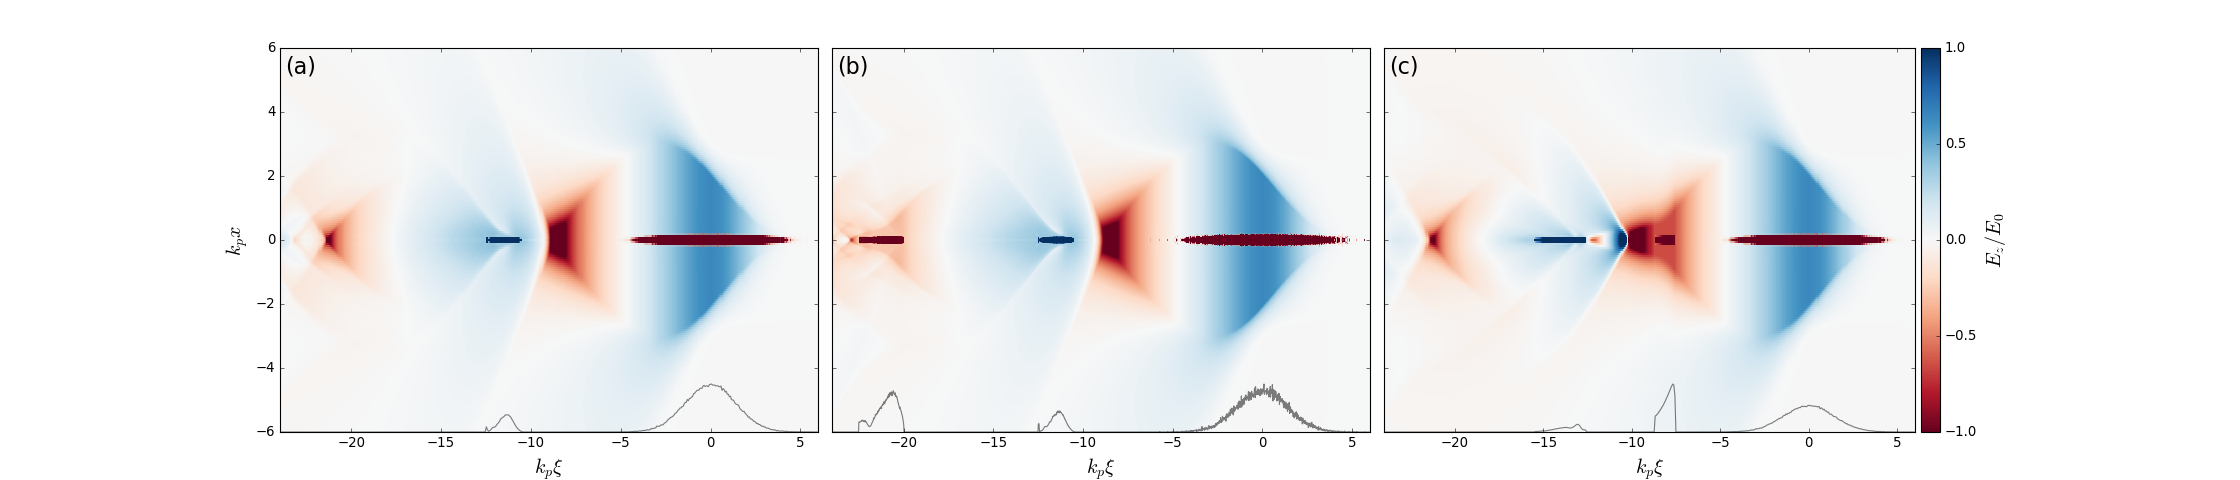

In [4]:
s = 1.
col = 'm'
prfl = 'k'

none.EZ = none.ts.get_field(field = 'Ez', iteration = none.iteration)[0]
behind.EZ = behind.ts.get_field(field = 'Ez', iteration = behind.iteration)[0]
front.EZ = front.ts.get_field(field = 'Ez', iteration = front.iteration)[0]

plt.close()
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(28, 6), gridspec_kw={'width_ratios': [1, 1, 1.175]})
plt.subplots_adjust(wspace=0.025)

imNone = axs[0].pcolormesh(none.info.z, none.info.x, none.EZ.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[0].pcolormesh(none.info.z, none.info.x, none.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[0].plot(none.info.z, 1.5 * none.profile / max(none.profile) - 6, prfl, alpha = .5)

imBehind = axs[1].pcolormesh(behind.info.z, behind.info.x, behind.EZ.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[1].pcolormesh(behind.info.z, behind.info.x, behind.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[1].plot(behind.info.z, 1.5 * behind.profile / max(behind.profile) - 6, prfl, alpha = .5)

imFront = axs[2].pcolormesh(front.info.z, front.info.x, front.EZ.T, cmap = 'RdBu', vmin = -s, vmax = s)
axs[2].pcolormesh(front.info.z, front.info.x, front.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
axs[2].plot(front.info.z, 1.5 * front.profile / max(front.profile) - 6, prfl, alpha = .5)
cb = plt.colorbar(imFront, pad = .01)
cb.set_label(r'$E_z/E_0 $', fontsize = 18)

for ax in axs[:]:
    ax.set_xlim(behind.info.zmin, behind.info.zmax)
    ax.set_xlabel(r'$k_p\xi$', fontsize = 18)

axs[0].set_xlim(none.info.zmin, none.info.zmax)

axs[0].set_ylim(-6, 6)
axs[0].set_ylabel(r'$k_px$', fontsize = 18)

labels = ['(a)', '(b)', '(c)']
for lab, ax in zip(labels, axs.flat):
    ax.text(0.01, 0.98, lab, transform=ax.transAxes, fontsize=20, verticalalignment='top')

# plt.savefig('/Users/max/HiPACE/recovery/images/fEzH.png', dpi = 300, bbox_inches = 'tight')
plt.show()

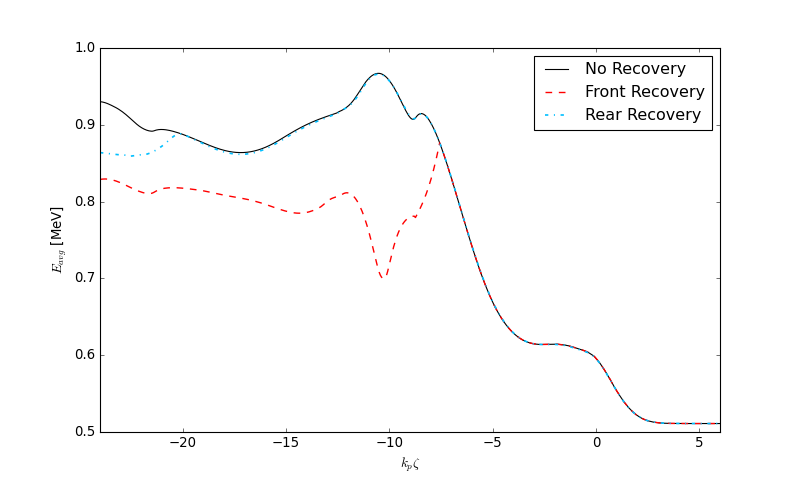

In [8]:
none.electronInsitu = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/{n}/reduced_electrons.0000.txt')
front.electronInsitu = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/{f}/reduced_electrons.0000.txt')
behind.electronInsitu = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/{b}/reduced_electrons.0000.txt')

plt.close()
plt.figure(figsize = (10, 6))
plt.plot(none.info.z, 1e-6 * diag.energy_mean_eV(none.electronInsitu, True)[0], label = 'No Recovery', c = 'k', ls = '-')
plt.plot(front.info.z, 1e-6 * diag.energy_mean_eV(front.electronInsitu, True)[0], label = 'Front Recovery', c = 'r', ls = '--', alpha = 1, linewidth = 1.25)
plt.plot(behind.info.z, 1e-6 * diag.energy_mean_eV(behind.electronInsitu, True)[0], label = 'Rear Recovery', c = 'deepskyblue', ls = '-.', alpha = 1, linewidth = 1.5)
# plt.vlines(max(front.zr), .5, 1., color = 'gray', linestyle = '--', alpha = .5, label = '_Recovery Head')

plt.xlabel('$k_p\zeta$')
plt.ylabel(r'$E_{avg}$ [MeV]')
plt.xlim(behind.info.zmin, behind.info.zmax)
plt.ylim(.5, 1.)
plt.legend(loc = 'best')
# plt.savefig('/Users/max/HiPACE/recovery/images/fPlasmaEnergy.png', dpi = 300, bbox_inches = 'tight')
plt.show()